# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

44.574527977778125
160468.30072000125
131378.48068799995
energie die in het water zit is: 176425.28068799994 J


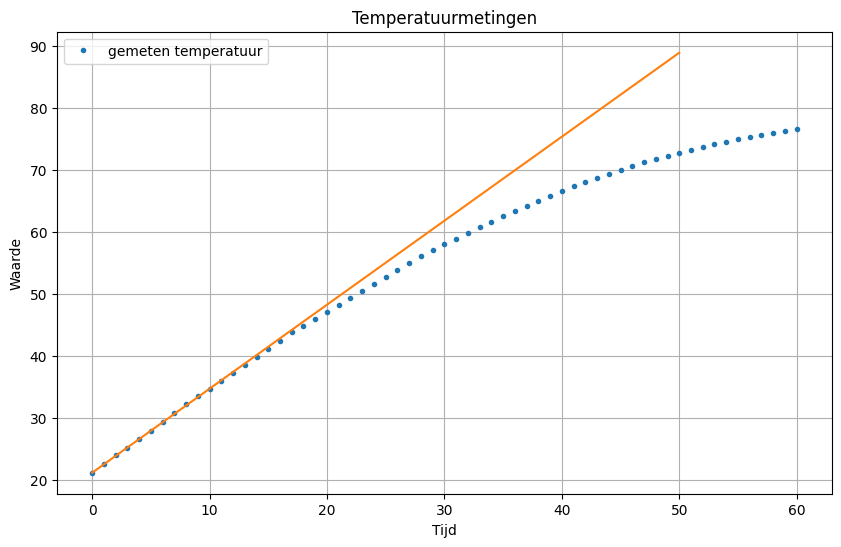

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Cwater= 4186 #J/kgoC
Mwaterstart= 472.1 #g
Mwatereind= 454.1 #g
Mwverschil= Mwaterstart - Mwatereind #g
Mwverschil_kg = Mwverschil/1000 #kg

Edamp=2502.6 * Mwverschil_kg * 1000 #J

#data inlezen
data= pd.read_csv('tempmetingen.csv', delimiter=";")
tijd= data["t (min)"].to_numpy()
temperatuur= data["t (oC)"].to_numpy()

def function(t,P):
    return 21.2 +(P*t*60)/(Mwaterstart/1000*Cwater)

popt, cov = curve_fit(function, tijd[:5], temperatuur[:5])
x_test=np.linspace(0,50,500)
y_test=function(x_test, *popt)
print(popt[0])

Ebij= popt[0]*3600 #J
Eopgenomen = (temperatuur[-1]-temperatuur[0])/(max(y_test)-temperatuur[0])* Ebij

Everschil = Eopgenomen + Edamp
print(Ebij)
print(Eopgenomen)

print("energie die in het water zit is:", Everschil, "J")

plt.figure(figsize=(10,6))
plt.plot(tijd, temperatuur, '.', label='gemeten temperatuur')
plt.plot(x_test,y_test)
plt.xlabel("Tijd")
plt.ylabel("Waarde")
plt.title("Temperatuurmetingen")
plt.grid(True)
plt.legend()
plt.show() 